In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import SQL_queries as q
from IPython.display import display, HTML

# Exploratory Data Analysis - Pittsburgh Penguins Playoff Data - 2016
--------
### To begin the EDA process, I use SQL queries to build DataFrames to include:

* general information about each game, play, event, and event locations
* skater stats
* team stats
* shift information
### [Check out the queries for yourself](SQL_queries.py)
----

In [2]:
 conn = sqlite3.connect('NHL_data.db')

In [3]:
pens_2016_playoff_df = pd.read_sql_query(q.playoff_2016_data_query, conn)
pens_2016_playoff_df.head()

,Unnamed: 0,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTimeRemaining,dateTime,goals_away,goals_home,play_id,game_id,player_id,playerType,firstName,lastName
0,3165356,2015030141_4,2015030141,5.0,3.0,Faceoff,None,0.0,0.0,1,...,1200.0,2016-04-14 01:10:15,0,0,2015030141_4,2015030141,8471675,Winner,Sidney,Crosby
1,3165356,2015030141_4,2015030141,5.0,3.0,Faceoff,None,0.0,0.0,1,...,1200.0,2016-04-14 01:10:15,0,0,2015030141_4,2015030141,8474613,Loser,Derek,Stepan
2,3165358,2015030141_6,2015030141,3.0,5.0,Faceoff,None,-69.0,22.0,1,...,1193.0,2016-04-14 01:10:52,0,0,2015030141_6,2015030141,8471675,Loser,Sidney,Crosby
3,3165358,2015030141_6,2015030141,3.0,5.0,Faceoff,None,-69.0,22.0,1,...,1193.0,2016-04-14 01:10:52,0,0,2015030141_6,2015030141,8474613,Winner,Derek,Stepan
4,3165359,2015030141_7,2015030141,3.0,5.0,Hit,None,-5.0,-40.0,1,...,1185.0,2016-04-14 01:11:17,0,0,2015030141_7,2015030141,8470630,Hitter,Kevin,Klein


### Next, let's explore and clean it up a little:
- take a look at columns and unique values for important categorical columns
- find and delete duplicate values
- identify null values, and determine whether to drop values
- replace team_id_for and team_id_against with team name abbreviations, for easier readability 

In [4]:
pens_2016_playoff_df.columns

Index(['Unnamed: 0', 'play_id', 'game_id', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'play_id', 'game_id', 'player_id', 'playerType',
       'firstName', 'lastName'],
      dtype='object')

In [5]:
#find and delete duplicated values
pens_2016_playoff_df = pens_2016_playoff_df.iloc[:,~pens_2016_playoff_df.columns.duplicated()]
#remove unwanted columns
pens_2016_playoff_df = pens_2016_playoff_df.drop(['Unnamed: 0','player_id'], axis=1)

In [6]:
#verify
pens_2016_playoff_df.columns

Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'playerType', 'firstName', 'lastName'],
      dtype='object')

In [7]:
#display values for Event, Secondary Type, and Period:
print(f' Event Types: {pens_2016_playoff_df.event.unique()} \n')
print(f'Secondary Types: {pens_2016_playoff_df.secondaryType.unique()} \n')
print(f' Period Types: {pens_2016_playoff_df.periodType.unique()} \n')
print(f' Player Types: {pens_2016_playoff_df.playerType.unique()}')

 Event Types: ['Faceoff' 'Hit' 'Blocked Shot' 'Shot' 'Missed Shot' 'Giveaway' 'Penalty'
 'Takeaway' 'Goal'] 

Secondary Types: [None 'Snap Shot' 'Wrist Shot' 'Slap Shot' 'Wrap-around' 'Hooking'
 'Tip-In' 'Illegal check to head' 'Unsportsmanlike conduct' 'Interference'
 'Backhand' 'Holding' 'Tripping' 'Hi stick - double minor' 'Roughing'
 'Interference - Goalkeeper' 'Slashing' 'Cross checking' 'Fighting'
 'Boarding' 'Holding the stick' 'Hi-sticking' 'Embellishment'
 'Too many men on the ice' 'Delaying Game - Puck over glass' 'Elbowing'
 'Misconduct' 'Deflected'] 

 Period Types: ['REGULAR' 'OVERTIME'] 

 Player Types: ['Winner' 'Loser' 'Hitter' 'Hittee' 'Shooter' 'Blocker' 'Goalie'
 'PlayerID' 'PenaltyOn' 'DrewBy' 'Assist' 'Scorer' 'ServedBy']


In [8]:
#check for null values
pens_2016_playoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13179 entries, 0 to 13178
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   play_id              13179 non-null  object 
 1   game_id              13179 non-null  int64  
 2   team_id_for          13179 non-null  float64
 3   team_id_against      13179 non-null  float64
 4   event                13179 non-null  object 
 5   secondaryType        3586 non-null   object 
 6   x                    13163 non-null  float64
 7   y                    13165 non-null  float64
 8   period               13179 non-null  int64  
 9   periodType           13179 non-null  object 
 10  periodTime           13179 non-null  int64  
 11  periodTimeRemaining  13179 non-null  float64
 12  dateTime             13179 non-null  object 
 13  goals_away           13179 non-null  int64  
 14  goals_home           13179 non-null  int64  
 15  playerType           13179 non-null 

In [9]:
secondary_type_percent_null_1 = (pens_2016_playoff_df['secondaryType'].isnull().sum())/13179*100
print(f'2016 Secondary Type Null Percent :{secondary_type_percent_null_1:.2f}%')

2016 Secondary Type Null Percent :72.79%


In [10]:
#check to see which events have a secondary type:
pens_2016_playoff_df.dropna().event.unique()

array(['Shot', 'Penalty', 'Goal'], dtype=object)

In [11]:
#After consideration, I've decided to drop the column 'secondaryType'.
pens_2016_playoff_df = pens_2016_playoff_df.drop('secondaryType',axis=1)

In [12]:
#query the NHL database for all team numbers and their associated abbreviations
team_ids_df = pd.read_sql_query(q.get_abb_query, conn)
#create a dictionary from the abbreviation df
abb_dict = pd.Series(team_ids_df.abbreviation.values,index=team_ids_df.team_id).to_dict()
#replace row values in the dataframe with values from the dictionary
pens_2016_playoff_df = pens_2016_playoff_df.replace({'team_id_for':abb_dict})
pens_2016_playoff_df = pens_2016_playoff_df.replace({'team_id_against':abb_dict})
pens_2016_playoff_df = pens_2016_playoff_df.rename(columns={'team_id_for':'team_for', 'team_id_against':'team_against'})

In [13]:
#confirm replacement
pens_2016_playoff_df.head()

,play_id,game_id,team_for,team_against,event,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,playerType,firstName,lastName
0,2015030141_4,2015030141,PIT,NYR,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2016-04-14 01:10:15,0,0,Winner,Sidney,Crosby
1,2015030141_4,2015030141,PIT,NYR,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2016-04-14 01:10:15,0,0,Loser,Derek,Stepan
2,2015030141_6,2015030141,NYR,PIT,Faceoff,-69.0,22.0,1,REGULAR,7,1193.0,2016-04-14 01:10:52,0,0,Loser,Sidney,Crosby
3,2015030141_6,2015030141,NYR,PIT,Faceoff,-69.0,22.0,1,REGULAR,7,1193.0,2016-04-14 01:10:52,0,0,Winner,Derek,Stepan
4,2015030141_7,2015030141,NYR,PIT,Hit,-5.0,-40.0,1,REGULAR,15,1185.0,2016-04-14 01:11:17,0,0,Hitter,Kevin,Klein


### Now that the DataFrame is cleaned up, I want to group it by game_id, into the following rounds for the playoffs:
| Year   | 2016                  |
|--------|-----------------------|
| Round 1 | New York Rangers      |
| Round 2 | Washington Capitals   |
| Round 3 | Tampa Bay Lightning   |
| Final | San Jose Sharks       | 

To accomplish this, I'll have to groupby 'game_id', and do a little data wrangling with the team names

In [14]:
#group by game_id
games_teams_2016 = pens_2016_playoff_df.groupby('game_id').team_for.unique().reset_index()
#display current state
games_teams_2016.head()

,game_id,team_for
0,2015030141,"[PIT, NYR]"
1,2015030142,"[NYR, PIT]"
2,2015030143,"[PIT, NYR]"
3,2015030144,"[NYR, PIT]"
4,2015030145,"[PIT, NYR]"


In [15]:
#remove PIT, and show only the opposing team:
games_teams_2016['opposing_team'] = games_teams_2016['team_for'].apply(
    lambda row: [val for val in row if val != 'PIT']
)
#remove defunct column
games_teams_2016.drop('team_for',axis=1, inplace=True)
#display new state:
games_teams_2016.head()

,game_id,opposing_team
0,2015030141,[NYR]
1,2015030142,[NYR]
2,2015030143,[NYR]
3,2015030144,[NYR]
4,2015030145,[NYR]


In [16]:
#isolate the team name, since it has become a list instead of a string:
games_teams_2016['opposing_team'] = games_teams_2016['opposing_team'].str[0]
#show how many games per team:
games_teams_2016['opposing_team'].value_counts()

opposing_team
TBL    7
WSH    6
SJS    6
NYR    5
Name: count, dtype: int64

In [17]:
#create a list of game_ids for each playoff round:
NYR_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='NYR'].game_id)
SJS_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='SJS'].game_id)
TBL_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='TBL'].game_id)
WSH_2016_games = list(games_teams_2016[games_teams_2016['opposing_team']=='WSH'].game_id)

In [18]:
#use the lists above to filter into rounds:
Round_1_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(NYR_2016_games)]
Round_2_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(WSH_2016_games)]
Round_3_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(TBL_2016_games)]
Round_4_2016 = pens_2016_playoff_df[pens_2016_playoff_df['game_id'].isin(SJS_2016_games)]
All_rounds_2016 = [Round_1_2016,Round_2_2016,Round_3_2016,Round_4_2016]

### Now that we have the data sorted into rounds, let's calculate some more player stats per playoff round:
- Faceoff Differential (Wins vs. Losses)
- Penalty Differential
- Shot Success (% of shots on net resulting in goals)

#### Before beginning, we need to filter the dataframes to only show penguins players
- use a csv file containing the roster for 2016
- separate good and bad plays, to determine which player to filter on (team_against or team_for)

In [19]:
#load the roster into a df
Pens_2016_roster = pd.read_csv('Pens_2016_roster.csv')
#replace special characters with plain
Pens_2016_roster['Player'] = Pens_2016_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
#split into first and last names
Pens_2016_roster[['firstName', 'lastName']] = Pens_2016_roster['Player'].str.split(expand=True)
#create a roster list by last name
Pens_2016_roster_list = list(Pens_2016_roster['lastName'])

## First, let's take a look at faceoff differentials and how they changed over the course of the 2016 Playoffs

### Faceoff Differential in Hockey

Faceoff differential is a critical metric in hockey that measures a player's effectiveness in winning faceoffs compared to their opponents. Faceoffs are pivotal moments during a game, often determining puck possession and control. This metric is calculated by taking the ratio of faceoffs won (Winner) to the total faceoffs (Winner + Loser) for each player.

### Importance of Faceoff Differential

Faceoff wins contribute directly to a team's ability to control the puck and initiate offensive plays. Players with a positive faceoff differential excel in gaining possession for their team, leading to increased scoring opportunities and defensive stability. Faceoff specialists are particularly valuable during critical moments, such as power plays and penalty kills.

### Plot Interpretation

The line plot above illustrates the faceoff differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized faceoff differential. The legend displays each player's name along with their average faceoff differential over the four rounds.

### Calculation Methodology

Faceoff differentials were calculated for each player by analyzing two types of faceoffs: faceoffs won (Winner) and faceoffs lost (Loser). The formula used is as follows:

**Faceoff Differential = Faceoffs Won \ (Faceoffs Won + Faceoffs Lost)**

To normalize the faceoff differential, the calculated values were averaged over the four playoff rounds, providing a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Players with positive differentials excel in winning faceoffs and contributing to their team's overall control of the game.
- Negative differentials may suggest areas for improvement in faceoff skills.

This analysis aims to provide insights into each player's impact during faceoff situations and their contribution to team success.


In [ ]:
#calculate faceoff wins or losses:
def calculate_faceoffs(round_df, player_type):
    faceoffs = round_df[round_df['playerType'] == player_type]
    faceoffs = faceoffs.groupby('lastName')['playerType'].value_counts().reset_index(name=f'count_{player_type}')
    return faceoffs

#calculate faceoff differential for a given round
def calculate_faceoff_stats(wins, losses):
    faceoff_stats = wins.merge(losses, on='lastName', how='left') 
    faceoff_stats['Differential'] = faceoff_stats[f'count_Winner'] / (
            faceoff_stats[f'count_Winner'] + faceoff_stats[f'count_Loser'])
    return faceoff_stats

#print top five differentials for a given round
def print_top_five_differentials(df, round_number):
    print(f'Top Five Faceoff Differentials, Round {round_number}, 2016')
    print(df[['lastName', 'Differential']].sort_values(by='Differential', ascending=False).head(5), '\n\n')

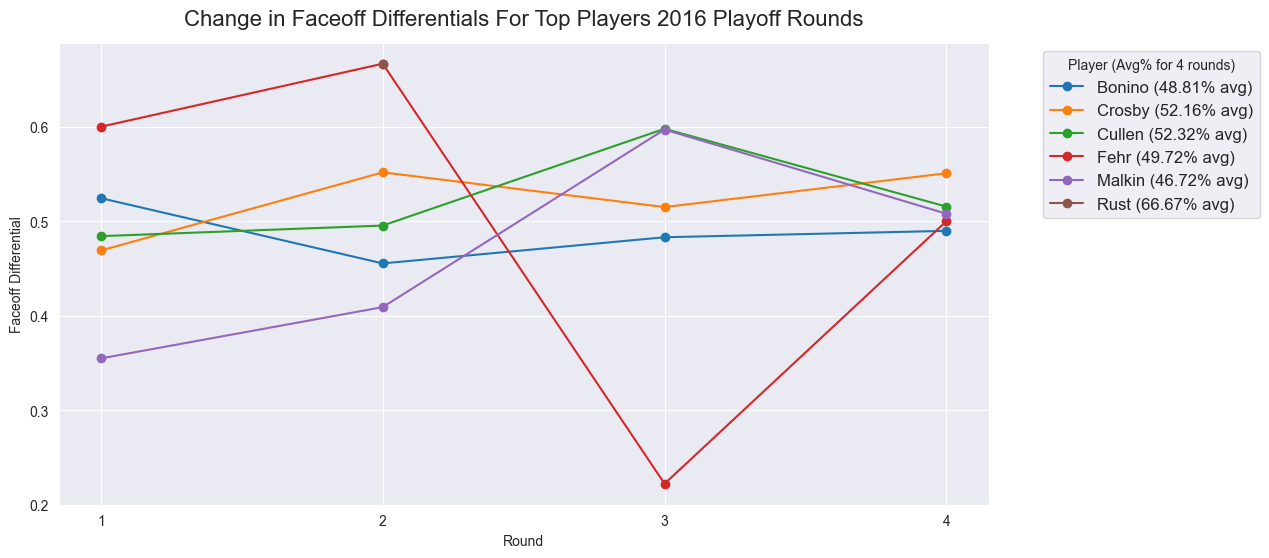

In [176]:
#store all faceoff differentials
all_stats_all_rounds = pd.DataFrame()

#store the number of points for each player
player_points = {}

for i, round_df in enumerate(All_rounds_2016, start=1):
    round_name = f'Round_{i}'

    #calculate faceoff wins and losses
    wins = calculate_faceoffs(round_df, 'Winner')
    losses = calculate_faceoffs(round_df, 'Loser')

    #calculate faceoff stats
    faceoff_stats = calculate_faceoff_stats(wins, losses)

    #filter faceoff_stats for players in the roster list
    faceoff_stats_filtered = faceoff_stats[faceoff_stats['lastName'].isin(Pens_2016_roster_list)].copy()

    #add a column for the round number using .loc
    faceoff_stats_filtered.loc[:, 'round_number'] = i

    #concatenate faceoff stats for the current round to the overall dataframe
    all_stats_all_rounds = pd.concat([all_stats_all_rounds, faceoff_stats_filtered], ignore_index=True)

    #update player_points dictionary
    for player in faceoff_stats_filtered['lastName'].unique():
        player_points[player] = player_points.get(player, 0) + 1

#get unique players with at least two points
players_with_two_points = [player for player, points in player_points.items() if points >= 2]

#filter faceoff stats for players with at least two points
all_stats_all_rounds_filtered = all_stats_all_rounds[all_stats_all_rounds['lastName'].isin(players_with_two_points)]

#create a consistent color mapping for players
player_color_mapping = {player: sns.color_palette()[i] for i, player in enumerate(players_with_two_points)}

# Sort players to ensure consistency in legend order
players_with_two_points_sorted = sorted(players_with_two_points)

# Plot the change in faceoff differentials over time using seaborn
plt.figure(figsize=(12, 6))

for player in players_with_two_points_sorted:
    player_data = all_stats_all_rounds_filtered[all_stats_all_rounds_filtered['lastName'] == player]
    avg_diff = player_data['Differential'].mean()
    
    plt.plot(
        player_data['round_number'],
        player_data['Differential'],
        label=f'{player} ({avg_diff:.2%} avg)',
        color=player_color_mapping[player],
        marker='o',  # Set the marker type as needed
        linestyle='-',  # Set the line style as needed
    )

# Modify x-axis to show only integers 1-4
plt.xticks(range(1, 5))

plt.title('Change in Faceoff Differentials For Top Players 2016 Playoff Rounds', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Faceoff Differential')
plt.legend(title='Player (Avg% for 4 rounds)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()


As seen in the graph, although Nick Bonino did not have the highest average faceoff win percentage for the entire playoffs, from round to round he stayed very consistent, hovering right around a 50% success rate.

## Next, take a look at Penalties

### Penalty Differential in Hockey

Penalty differential in hockey is a metric that quantifies a player's impact on penalties during a game. It is calculated by taking the difference between the number of penalties drawn (DrewBy) and the number of penalties taken (PenaltyOn) by a player. A positive penalty differential indicates that a player draws more penalties than they take, while a negative value suggests the opposite.

### Importance of Penalty Differential

Penalty differential is a crucial metric in hockey analytics as it reflects a player's ability to create power-play opportunities for their team while minimizing time spent shorthanded. Players with a positive penalty differential contribute to their team's offensive advantage, putting additional pressure on the opposing team. On the other hand, a negative penalty differential may indicate a player who takes more penalties than they draw, potentially putting their team at a disadvantage.

### Plot Interpretation

The line plot below illustrates the penalty differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized penalty differential. The legend displays each player's name along with their total penalty differential over the four rounds.

### Calculation Methodology

Penalty differentials were calculated for each player by analyzing two types of penalties: penalties drawn (DrewBy) and penalties taken (PenaltyOn). The formula used is as follows:

**Penalty Differential = Penalties Drawn - Penalties Taken**

To normalize the penalty differential, the calculated values were divided by the total number of games played by each player to provide a per-game metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Positive values indicate players who contribute positively to their team by drawing more penalties than they take.
- Negative values suggest players who may need to minimize their penalty-taking tendencies.

This analysis aims to provide insights into player discipline and their impact on team performance during the playoffs.


In [201]:
player_games_played = {}

# Iterate through each round's dataframe
for round_df in All_rounds_2016:
    # Extract unique game IDs for each player
    games_played_per_player = round_df.groupby('lastName')['game_id'].nunique().reset_index(name='gamesPlayed')

    # Update the dictionary with the total games played for each player
    for index, row in games_played_per_player.iterrows():
        player = row['lastName']
        games_played = row['gamesPlayed']

        player_games_played[player] = player_games_played.get(player, 0) + games_played


C:\Users\User\AppData\Local\Temp\ipykernel_20752\2718783274.py:82: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for line, style in zip(line2d_objects, penalty_legend.legendHandles):


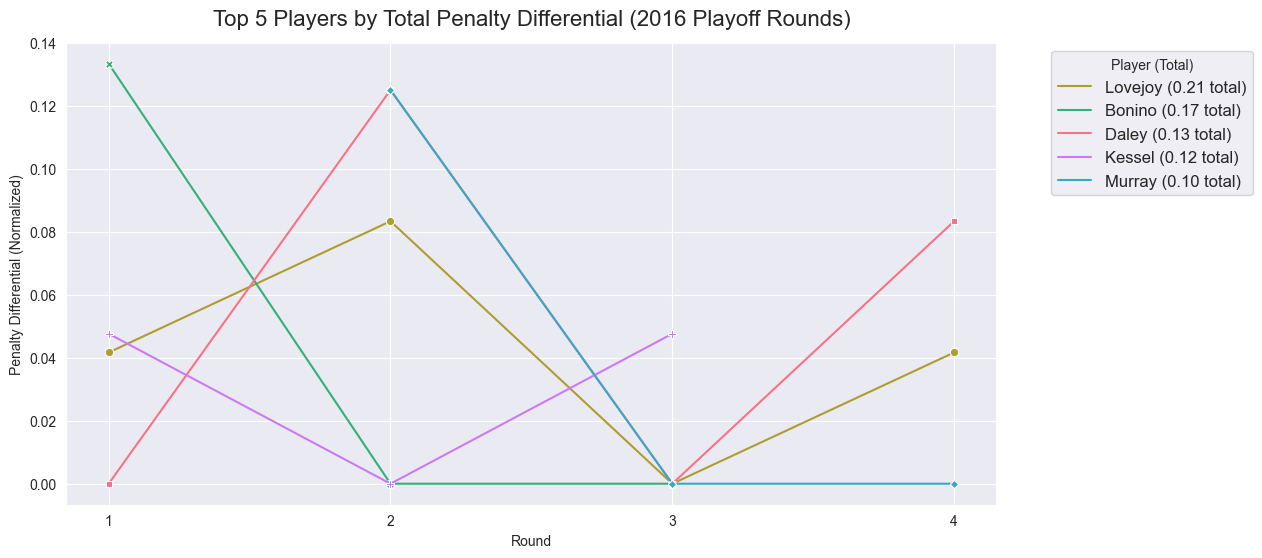

In [202]:
all_penalty_stats_all_rounds = pd.DataFrame()

# Store the total penalty differential for each player
player_total_penalty_diff = {}

for i, round_df in enumerate(All_rounds_2016, start=1):
    #calculate penalty differentials
    penalties_on = round_df[round_df['playerType'] == 'PenaltyOn'].groupby('lastName').size().reset_index(name='PenaltiesOn')
    penalties_by = round_df[round_df['playerType'] == 'DrewBy'].groupby('lastName').size().reset_index(name='PenaltiesBy')

    penalty_stats = pd.merge(penalties_on, penalties_by, how='outer', left_on='lastName', right_on='lastName')
    penalty_stats['PenaltiesBy'].fillna(0, inplace=True)
    penalty_stats['Differential'] = penalty_stats['PenaltiesOn'] - penalty_stats['PenaltiesBy']

    #filter penalty_stats for players in the roster list
    penalty_stats_filtered = penalty_stats[penalty_stats['lastName'].isin(Pens_2016_roster_list)].copy()

    #add a column for the round number
    penalty_stats_filtered.loc[:, 'round_number'] = i

    #handle NaN values and division by zero
    penalty_stats_filtered['Differential'] = penalty_stats_filtered['Differential'].fillna(0)
    penalty_stats_filtered['Differential'] /= penalty_stats_filtered['lastName'].map(player_games_played).replace(0, 1)

    #concatenate penalty stats for the current round to the overall dataframe
    all_penalty_stats_all_rounds = pd.concat([all_penalty_stats_all_rounds, penalty_stats_filtered], ignore_index=True)

    #update player_total_penalty_diff dictionary
    for player, diff in zip(penalty_stats_filtered['lastName'], penalty_stats_filtered['Differential']):
        player_total_penalty_diff[player] = player_total_penalty_diff.get(player, 0) + diff

#get the top 5 players by total penalty differential (excluding NaN values)
top_n_players = sorted(player_total_penalty_diff, key=player_total_penalty_diff.get, reverse=True)[:5]  # Adjust the number as needed

#filter penalty stats for the top N players
all_penalty_stats_all_rounds_filtered = all_penalty_stats_all_rounds[all_penalty_stats_all_rounds['lastName'].isin(top_n_players)]

#create a larger color palette for players
larger_palette = sns.color_palette("husl", n_colors=len(top_n_players))

#create a consistent color mapping for players
player_penalty_color_mapping = {player: larger_palette[i] for i, player in enumerate(top_n_players)}

#plot the penalty differentials over time using seaborn
plt.figure(figsize=(12, 6))
penalty_plot = sns.lineplot(
    data=all_penalty_stats_all_rounds_filtered,
    x='round_number',
    y='Differential',
    hue='lastName',
    palette=player_penalty_color_mapping,
    style='lastName',
    markers=True,
    dashes=False,
)

#modify x-axis to show only integers 1-4
plt.xticks(range(1, i + 1))

#add total penalty differential to the legend with appropriate line styles
penalty_legend_labels = []
for player, line_style in zip(top_n_players, penalty_plot.lines):
    total_diff = player_total_penalty_diff[player]
    penalty_legend_labels.append(f'{player} ({total_diff:.2f} total)')

#explicitly set the line styles in the legend
penalty_legend = plt.legend(
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

#get the handles for the lines in the plot
handles, _ = penalty_plot.get_legend_handles_labels()

#create a list of Line2D objects
line2d_objects = [plt.Line2D([0], [0], color=handle.get_color(), linestyle='-', linewidth=handle.get_linewidth()) for handle in handles]

#update the line styles in the legend
for line, style in zip(line2d_objects, penalty_legend.legendHandles):
    style.set_linestyle('-')  # Set the desired line style here

#update the legend
penalty_legend = plt.legend(
    line2d_objects,
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

plt.title('Top 5 Players by Total Penalty Differential (2016 Playoff Rounds)', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Penalty Differential (Normalized)')
plt.show()

**Analysis**
The analysis of penalty differentials for the top five players in the 2016 playoff rounds reveals an interesting trend. Contrary to expectations, the top performers in terms of penalty differentials are not the well-known star players on the team. In fact, the players with the highest penalty differentials are not among the recognized names. This unexpected finding challenges the common assumption that top-performing players, who often dominate offensive and defensive statistics, would also lead in penalty differentials.

**Hypothesis**
One plausible explanation for this discrepancy is that the players with the highest penalty differentials may specialize in a more physical style of play. While star players focus on scoring goals and creating opportunities, these less-recognized players may contribute to the team by engaging in more aggressive and physical aspects of the game. Their playing style might lead to higher instances of penalties drawn or committed, influencing the penalty differentials.

Additionally, it's possible that the top players on the team are more strategic and disciplined in their play, avoiding unnecessary penalties. These star players may prioritize maintaining on-ice presence and avoiding penalties that could jeopardize their team's chances of success. In contrast, players with higher penalty differentials may be involved in more physical confrontations or play in a manner that results in a greater number of penalties.

**Conclusion**
In conclusion, the analysis suggests that penalty differentials alone may not be a comprehensive indicator of a player's overall contribution or importance to the team. The unique playing styles and roles of different players contribute to a nuanced understanding of team dynamics beyond traditional metrics. Further investigation into the specific playing styles and roles of players with high penalty differentials could provide additional insights into the dynamics of successful hockey teams.



## Now, let's sort the good and bad plays, in order to visualize some good and bad plays for the HBK line throughout the season

In [72]:
#sort good and bad plays
def sort_good_bad_plays(df):
    good_plays_df = df.loc[((df['playerType'].isin(['Hitter','Blocker','Scorer','Shooter'])) | (df['event']=='Takeaway'))]
    bad_plays_df = df.loc[(df['playerType'].isin(['Hittee','Shooter','DrewBy'])) | (df['event']=='Giveaway')]
    return good_plays_df, bad_plays_df

In [73]:
Round_1_2016_good_plays, Round_1_2016_bad_plays = sort_good_bad_plays(Round_1_2016)
Round_2_2016_good_plays, Round_2_2016_bad_plays = sort_good_bad_plays(Round_2_2016)
Round_3_2016_good_plays, Round_3_2016_bad_plays = sort_good_bad_plays(Round_3_2016)
Round_4_2016_good_plays, Round_4_2016_bad_plays = sort_good_bad_plays(Round_4_2016)

In [74]:
Round_1_2016_good_plays = Round_1_2016_good_plays[Round_1_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_1_2016_bad_plays = Round_1_2016_bad_plays[Round_1_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_2_2016_good_plays = Round_2_2016_good_plays[Round_2_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_2_2016_bad_plays = Round_2_2016_bad_plays[Round_2_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_3_2016_good_plays = Round_3_2016_good_plays[Round_3_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_3_2016_bad_plays = Round_3_2016_bad_plays[Round_3_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

Round_4_2016_good_plays = Round_4_2016_good_plays[Round_4_2016_good_plays['lastName'].isin(Pens_2016_roster_list)]
Round_4_2016_bad_plays = Round_4_2016_bad_plays[Round_4_2016_bad_plays['lastName'].isin(Pens_2016_roster_list)]

good_plays_2016_all_rounds = [Round_1_2016_good_plays,Round_2_2016_good_plays,Round_3_2016_good_plays,Round_4_2016_good_plays]
bad_plays_2016_all_rounds = [Round_1_2016_bad_plays,Round_2_2016_bad_plays,Round_3_2016_bad_plays,Round_4_2016_bad_plays]

In [80]:
#take a look at the playerType values:
good_player_types = Round_1_2016_good_plays.playerType.unique()
bad_player_types = Round_1_2016_bad_plays.playerType.unique()
print(f'good player types:{good_player_types}\nbad player types:{bad_player_types}\n')
#leave takeaways separate for now:
good_player_types = np.delete(good_player_types,4,0)
bad_player_types  = np.delete(bad_player_types,2,0)
#verify deletion:
print(f'coorected good player types:{good_player_types}\ncorrected bad player types:{bad_player_types}')

good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer' 'PlayerID']
bad player types:['Hittee' 'Shooter' 'PlayerID' 'DrewBy']

coorected good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer']
corrected bad player types:['Hittee' 'Shooter' 'DrewBy']


The funtion below uses a hockey rink image in the background to easily visualize the (x,y) coordinates of the plays given

In [81]:
def plotHockeyPoints_all_rounds(round_dfs, column, column_filter, players_of_interest):
    """
    Plot play points on the ice for all rounds, differentiating colors for each dataframe.

    :param round_dfs: List of DataFrames for each round
    :param column: This is the category that you are plotting on
    :param column_filter: Choose a way to filter the category
    :param players_of_interest: List of players to include
    :return: An image of the x, y coordinates for each play fitting the filter, overlayed on a hockey rink.
    """
    #combine all rounds into a single DataFrame
    combined_df = pd.concat(round_dfs)

    plt.figure(figsize=(10, 8))

    #filter the combined DataFrame
    scatter_data = combined_df.loc[(combined_df[column] == column_filter) & (combined_df['lastName'].isin(players_of_interest))]

    # Plot with background image
    fig = sns.scatterplot(x='x', y='y', data=scatter_data, hue='lastName')

    plt.title(f'Location of {column_filter}s')
    im = plt.imread("rink.jpg")
    im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
    plt.xlabel('')
    plt.ylabel('')
    fig.set(xticklabels=[])
    fig.set(yticklabels=[])
    fig.grid(False)

    #count occurrences of each player in the legend
    player_counts = scatter_data['lastName'].value_counts().to_dict()

    #get legend handles and labels
    handles, labels = fig.get_legend_handles_labels()

    #modify legend labels to include counts, handle cases where player is not in player_counts
    legend_labels = [f'{label} ({player_counts.get(label, 0)})' for label in labels]
    fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    plt.close()

### First, we can visualize the good plays for the HBK line:
- Shots on net
- Hits
- Blocked goals
- Goals

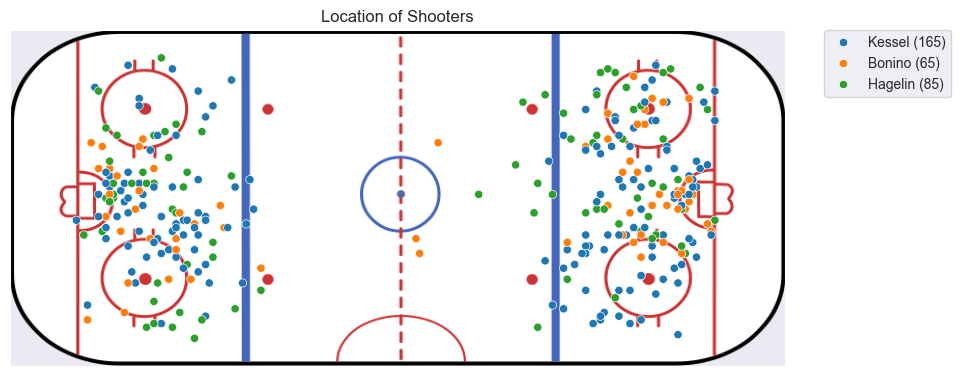

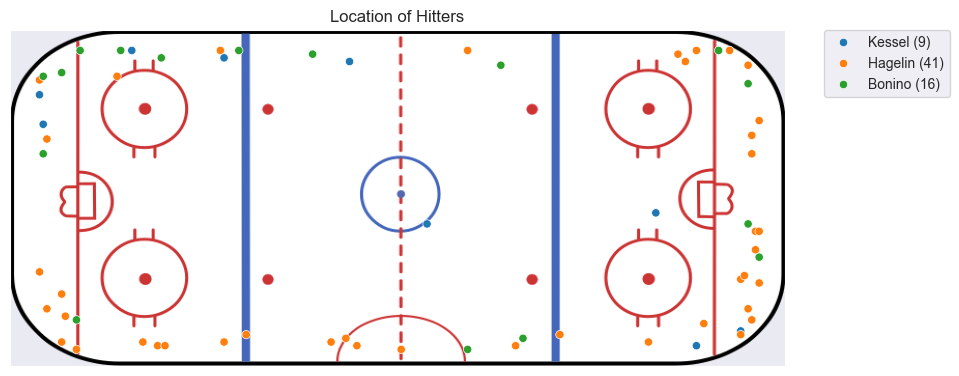

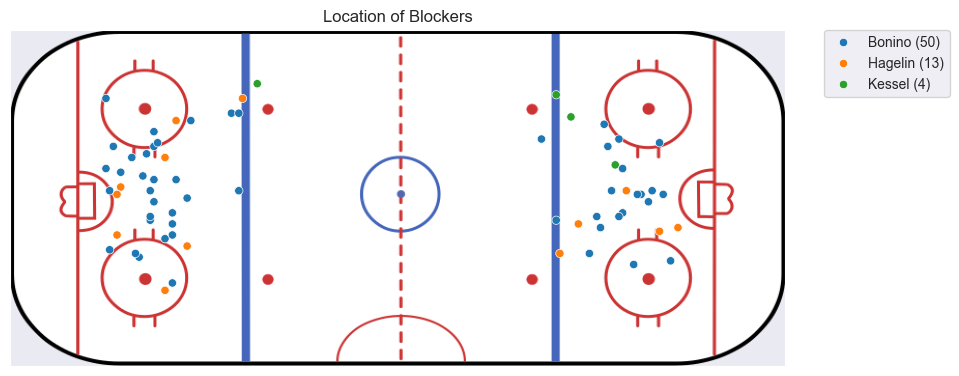

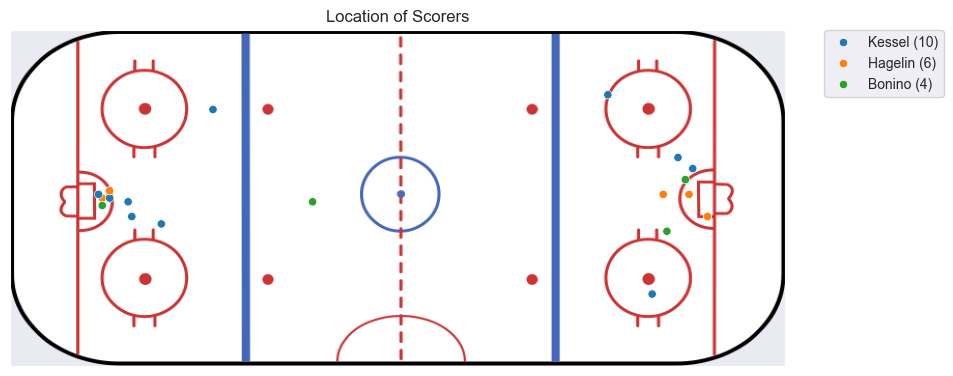

In [83]:
#graphs location and number of good plays for the HBK line 
for type in good_player_types:
    plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

As seen in the graphs above, for the 2016 playoffs, Phil Kessel dominates the line in Shots and Goals, whereas Carl Hagelin gives most of the hits, and Bonino blocks exponentially more shots than the rest of the line. 

This shows a great balance with the three. It's common for the Center (Bonino, in this case) to block a majority of the shots on net from the opposing team. What's interesting here, is that typically the Center would also take more shots on net. Clearly, in the case of the line, Kessel massively out-shoots his linemates.

### Now for the 'bad' plays for the HBK line
- Hittee (recipient of a hit)
- Shooter (of a blocked shot - failed scoring attempt)
- DrewBy (drew a penalty, thus resulting in the opposing team's power play)

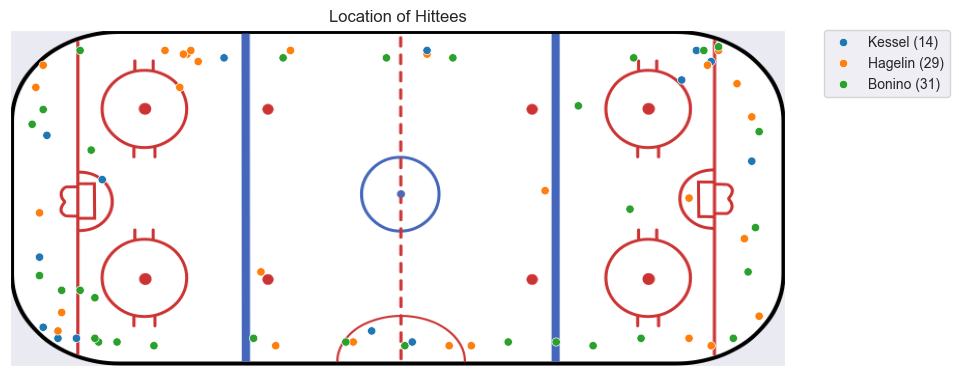

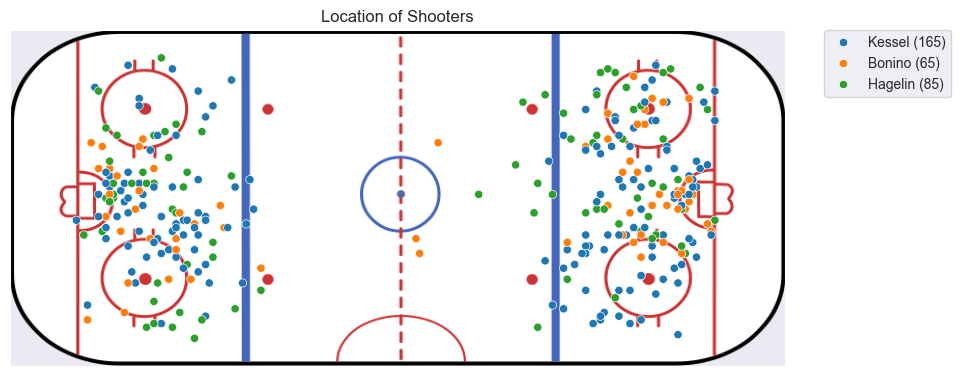

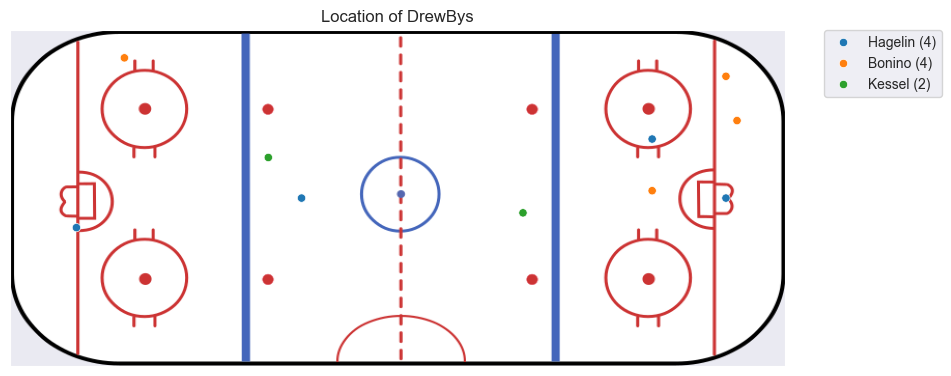

In [85]:
for type in bad_player_types:
    plotHockeyPoints_all_rounds(bad_plays_2016_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Not surprisingly, Kessel also has the highest amount of blocked shots. This makes sense, as the more shots you take overall, the more that will also be blocked. 

Also logical is that Hagelin is the recipient of the most hits, since he hits the most on the line. These two metrics indicate he definitely had a strong physical presence on the ice/ was a physical player.

All three players drew very few penalties over the course of the playoffs. This shows that although agressive, they must play clean/by the rules.

### Last, let's look at Takeaways and Giveaways

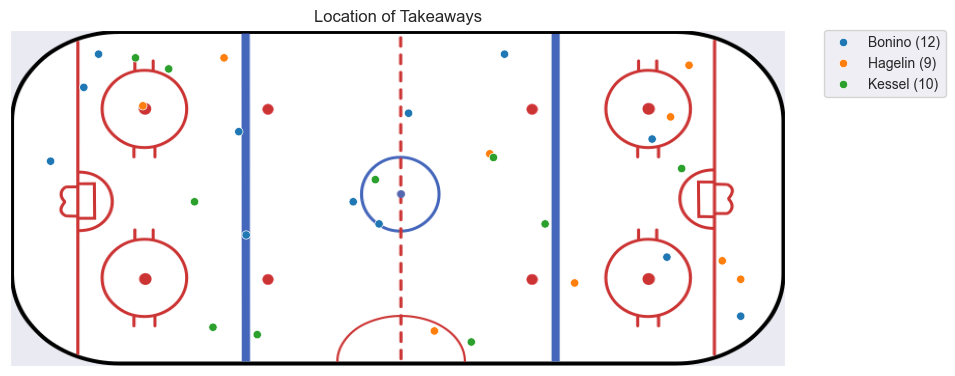

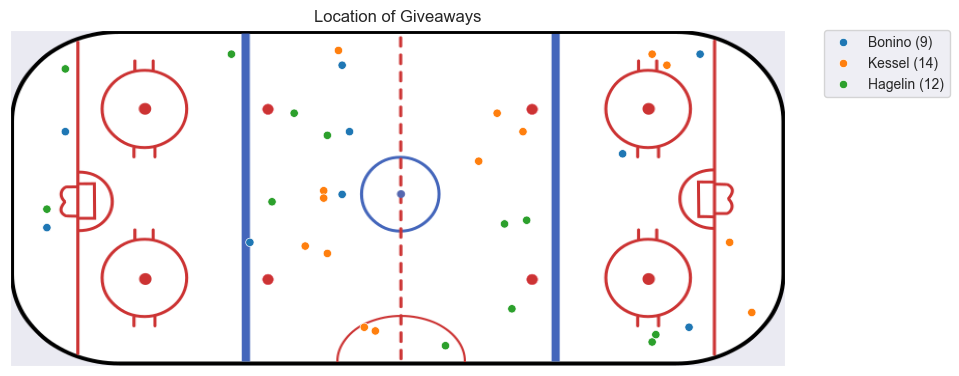

In [88]:
plotHockeyPoints_all_rounds(good_plays_2016_all_rounds, column='event', column_filter='Takeaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])
plotHockeyPoints_all_rounds(bad_plays_2016_all_rounds, column='event', column_filter='Giveaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

As we can see, in the course of the 2016 playoffs, Bonino had the most takeaways and fewest giveaways on the HBK line. 

It's hard to say how meaningful it is to look at these metrics on a playoff level, since the numbers are so close together over the course of many games. Further analysis into the different on a game-by-game basis would be an interesting area to research in a future project.

## Next, let's get into some more advanced stats and succes metrics
### We'll use two dataFrames. 
- The first, with more basic stats, has the advantage of being broken down into games, meaning we can eventually group by round if needed
- The second, has complex stats, but only for the entire playoff season

#### To combine the two initially for a great overall understanding, we can aggregate the first dF by player and merge it with the second.

In [89]:
pens_2016_playoff_skater_stats_basic = pd.read_sql_query(q.skater_stats_2016_query,conn)

In [91]:
pens_2016_playoff_skater_stats_basic.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'primaryPosition', 'abbreviation'],
      dtype='object')

#### Clean it up by removing unwanted columns

In [92]:
pens_2016_playoff_skater_stats_basic = pens_2016_playoff_skater_stats_basic.drop(['player_id','team_id'], axis=1)

#### Form the aggregated dataframe to prepare for a merge

In [94]:
#group by player last name, aggregate appropriately the statistics for the entire season
players_2016_sums_df = pens_2016_playoff_skater_stats_basic.groupby('lastName').aggregate({'goals':'sum', 'assists':'sum', 'plusMinus':'sum', 'hits':'sum', 'game_id':'count', 'timeOnIce':'mean', 'shots':'sum', 'takeaways':'sum','giveaways':'sum','blocked':'sum'}).reset_index()

### Now let's put together the advanced stats dataframe

In [114]:
pens_2016_playoff_skater_stats_adv = pd.read_csv('2016_adv_stats_pens_playoffs.csv',header=1)

In [116]:
#see what null values exist
null_counts = pens_2016_playoff_skater_stats_adv.isnull().sum()
print(null_counts[null_counts > 0])

E+/-     22
Thru%     1
dtype: int64


It seems that E+/- is fully empty, so we will drop the column. Let's see how many games were played by the player who is missing the Thru%

In [117]:
pens_2016_playoff_skater_stats_adv[pens_2016_playoff_skater_stats_adv['Thru%'].isnull()].GP

21    2
Name: GP, dtype: int64

Only 2 games, this player was not significant. We can drop all null values in this case.

In [118]:
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.dropna(axis=1)

#### Now let's easily add the first and last name columns, reusing work done previously with the roster:

In [119]:
pens_2016_playoff_skater_stats_adv = pd.merge(pens_2016_playoff_skater_stats_adv, Pens_2016_roster[['Player', 'firstName', 'lastName']], on='Player', how='left')

In [111]:
pens_2016_playoff_skater_stats_adv.columns

Index(['Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.'],
      dtype='object')

In [120]:
#drop unwanted columns
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv.drop(['Player','Age','-9999'], axis=1)

In [121]:
#get the list of column names
columns = list(pens_2016_playoff_skater_stats_adv.columns)
#specify the new column order
new_order = columns[-2:] + columns[:-2]
#reorder the columns in the DataFrame
pens_2016_playoff_skater_stats_adv = pens_2016_playoff_skater_stats_adv[new_order]
#take a look
pens_2016_playoff_skater_stats_adv.head()

,firstName,lastName,Rk,Pos,GP,CF,CA,CF%,CF% rel,FF,...,oiSH%,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,SAtt.
0,Beau,Bennett,1,RW,1,13,13,50.0,-2.3,12,...,0.0,66.7,66.7,66.7,33.3,11:18,11:08,0,1,3
1,Nick,Bonino,2,C,24,369,355,51.0,-1.0,268,...,9.4,93.0,102.4,53.3,46.7,17:12,13:54,12,9,69
2,Ian,Cole,3,D,24,323,318,50.4,-1.7,238,...,7.1,94.3,101.4,54.6,45.4,16:13,13:25,5,23,48
3,Sidney,Crosby,4,C,24,450,376,54.5,4.2,335,...,7.4,89.7,97.0,56.7,43.3,20:26,16:37,21,19,129
4,Matt,Cullen,5,C,24,195,302,39.2,-15.5,148,...,9.7,94.1,103.8,13.6,86.4,13:50,11:40,10,10,44


## Now we can put the basic and advanced stats all together into one large DataFrame

In [122]:
pens_player_stats_2016 = pd.merge(players_2016_sums_df, pens_2016_playoff_skater_stats_adv, on='lastName')

In [123]:
pens_player_stats_2016.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.'],
      dtype='object')

In [124]:
#duplicate values exist (some with different column names), let's get rid of them

# Transpose the DataFrame and identify duplicate rows (duplicate columns after transposing)
duplicates = pens_player_stats_2016.T[pens_player_stats_2016.T.duplicated()].index
# Drop duplicate columns
pens_player_stats_2016 = pens_player_stats_2016.drop(columns=duplicates, errors='ignore')
#verify
pens_player_stats_2016.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%', 'FF% rel',
       'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)', 'SAtt.'],
      dtype='object')

## Here we begin to look more deeply at measures of success over the course of the 2016 playoffs

### Shot Statistics Overview

In hockey analytics, shot statistics provide valuable insights into a team's or player's offensive performance. Let's explore key shot metrics:

**Shots Attempted (SAtt.)** Total number of shots attempted in all game situations.

**Shots on Goal (Shots)** Subset of attempted shots that were on target and required the goaltender to make a save.

**Through Percentage (Thru%)** Percentage of shots that successfully made it through to the net out of the total shots attempted (`SAtt.`).

**Shots Made Percentage (Shots_made_percent)** Percentage of shots on goal that resulted in a goal.

By examining these shot statistics, analysts and fans gain a comprehensive understanding of the offensive dynamics, accuracy, and goal-scoring proficiency of a team or player. These metrics contribute to a nuanced evaluation of performance beyond traditional box score statistics.


In [126]:
#calculate percent of successful shots:
pens_player_stats_2016['shot_success_rate'] = (pens_player_stats_2016['goals']/pens_player_stats_2016['shots'])*100
#separate shots stats into their own df
shooting_stats_2016 = pens_player_stats_2016[['lastName','SAtt.','shots','shot_success_rate','goals']].sort_values(by='SAtt.', ascending=False)
#print the resulting df, sorted by all shots made
shooting_stats_2016

,lastName,SAtt.,shots,shot_success_rate,goals
9,Kessel,175,98,10.204082,10
11,Letang,151,70,4.285714,3
3,Crosby,129,69,8.695652,6
13,Malkin,128,72,8.333333,6
10,Kunitz,91,50,8.000000,4
8,Hagelin,91,59,10.169492,6
6,Dumoulin,69,26,7.692308,2
1,Bonino,69,41,9.756098,4
17,Sheary,64,38,10.526316,4
15,Rust,60,34,17.647059,6


#### Let's visualize these numbers for the top five scorers

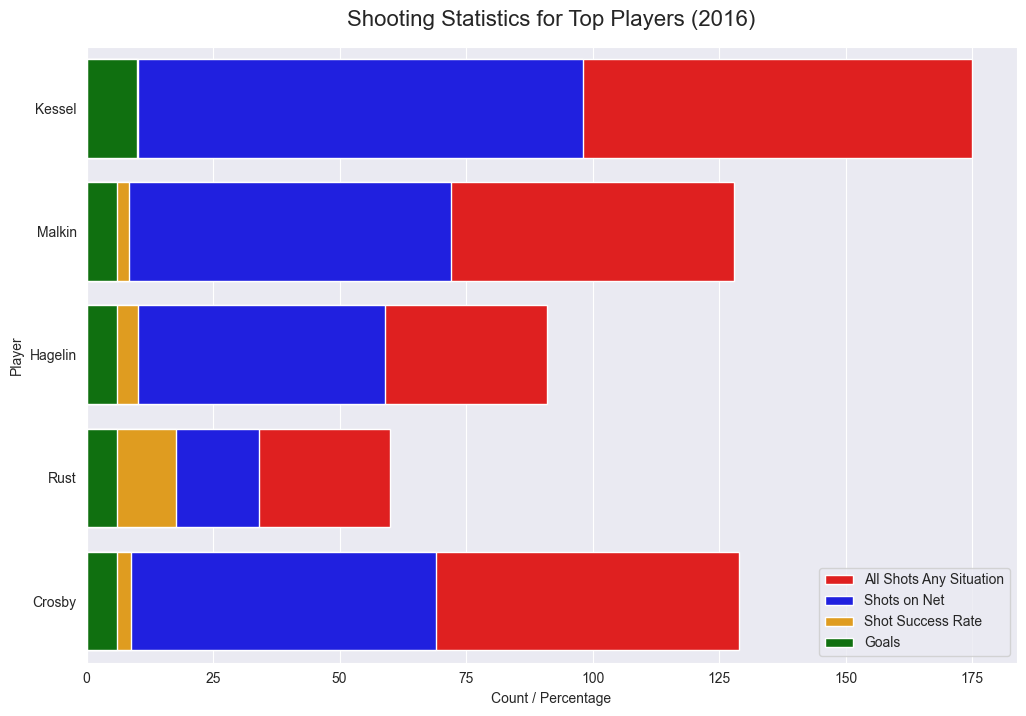

In [134]:
# Sort the DataFrame by shots made
shooting_stats_2016_sorted = shooting_stats_2016.sort_values(by='goals', ascending=False)

# Select the top N players (e.g., top 5)
top_players = shooting_stats_2016_sorted.head(5)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(x='SAtt.', y='lastName', data=top_players, color='red', label='All Shots Any Situation')
sns.barplot(x='shots', y='lastName', data=top_players, color='blue', label='Shots on Net')
sns.barplot(x='shot_success_rate', y='lastName', data=top_players, color='orange', label='Shot Success Rate')
sns.barplot(x='goals', y='lastName', data=top_players, color='green', label='Goals')


plt.xlabel('Count / Percentage')
plt.ylabel('Player')
plt.title('Shooting Statistics for Top Players (2016)', fontsize=16, y=1.02)
plt.legend()
plt.show()

What is made clear by this graph, is that although Phil Kessel far out-shot anyone else on the team, his shot success rate was actually quite small. He made the most goals this season, but this seems due to simply making the most shots. 

It's an interesting player comparison to someone like Bryan Rust, who took very few shots but had by far the highest shot success rate. 

As they say in hockey, you miss all of the shots you don't take. So although Kessel's success rate is smaller, simply making massive amounts of shots is clearly a valid strategy for success.

#### Goals are more than just the scorer. How do the players rank on assists?

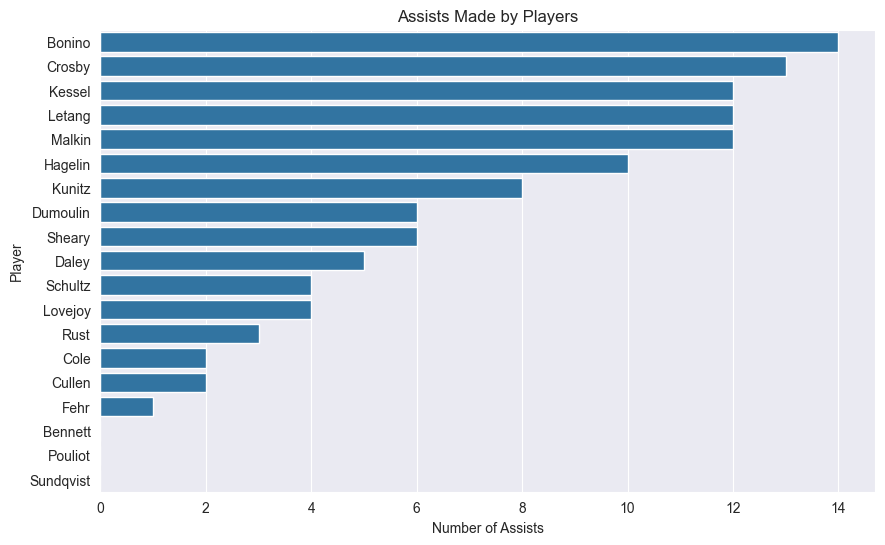

In [136]:
# Sort the DataFrame by the number of assists
pens_player_stats_2016 = pens_player_stats_2016.sort_values(by='assists', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='assists', y='lastName', data=pens_player_stats_2016)

plt.title('Assists Made by Players')
plt.xlabel('Number of Assists')
plt.ylabel('Player')
plt.show()

Two of the three members of the HBK Line fall in the top 5. It makes sense that either Bonino or Hagelin would have the most assists, given that Kessel had the most goals during this playoff season. 

It seems, given all we've seen so far, that this line could have operated as: 
- Hagelin committing more hits, creating space on the ice for productive plays
- Bonino making good passes
- Kessel firing the shots in

Also worth noting is the extremely high number of assists for the second ranked, Sidney Crosby. This suggests that it might be more logical to compare him to another center (Bonino), than to Kessel, with regard to goals. 

## CORSI and Fenwick are two common ways to measure player success. Below, we look at the CORSI For % (CF%) and Fenwick For % (FF%):


**Corsi For (CF)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) generated by a team or player while they are on the ice.
It is an indicator of offensive activity and measures how often a team or player is involved in offensive plays.


**Corsi Against (CA)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) faced by a team or player while they are on the ice.
It is an indicator of defensive activity and measures how often a team or player is defending against shot attempts from the opposing team.

**CF% = CF/(CF+CA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.



**Fenwick For (FF)** represents the total number of unblocked shot attempts (shots on goal and missed shots) generated by a team or player while they are on the ice.
FF does not include blocked shots in the count, focusing on shots that reach the net or miss the net entirely.


**Fenwick Against (FA)** represents the total number of unblocked shot attempts (shots on goal and missed shots) faced by a team or player while they are on the ice.
Similar to FF, FA excludes blocked shots, providing a measure of defensive activity without considering shots that were blocked by the opposing team.

**FF% = FF/(FF+FA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.


In [137]:
Corsi_Fenwick_stats_2016 = pens_player_stats_2016[['lastName','CF%', 'FF%']].sort_values(by='CF%', ascending=False)

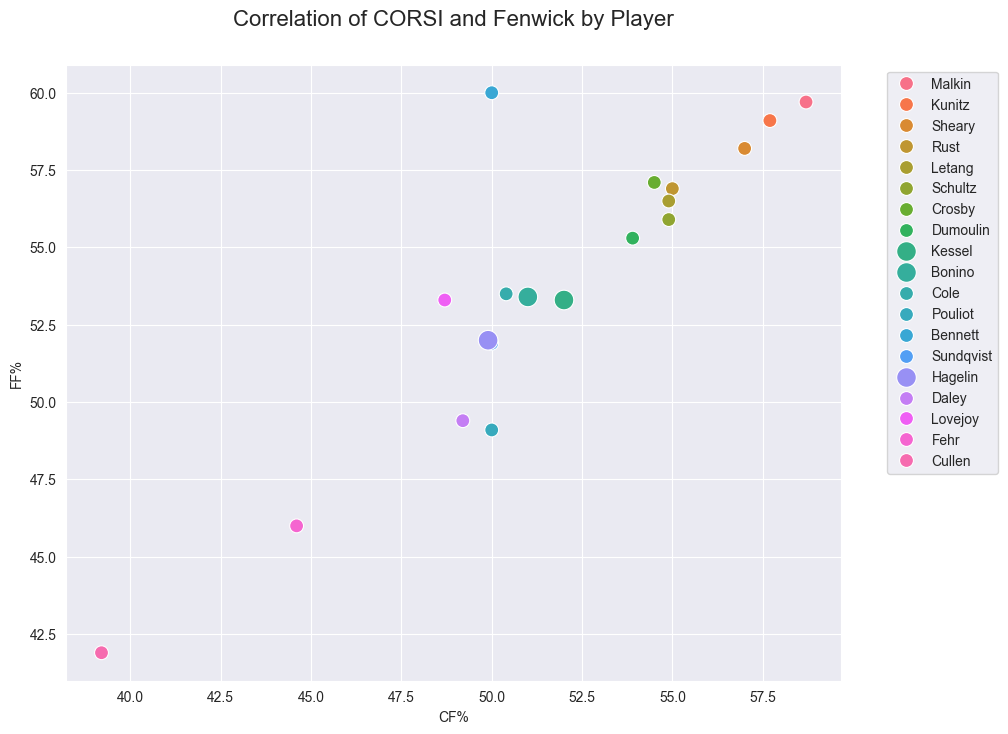

In [138]:
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2016, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2016['lastName']})



plt.title('Correlation of CORSI and Fenwick by Player', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

As seen, there is a very strong (likely linear) relationship between CORSI and Fenwick metrics. 

With the way fans discuss the HBK line, I would have expected the players to be located in the upper right quadrant of the graph, but they can all be found relatively in the middle of the graph, and not ranked in the top 1/2 for the team as a whole. 

Malkin, Kunitz, and Sheary scored the highest with both metrics, clearly contributing to the team's strong possession of the puck.

The outlier here seems to be Bennett, with a much higher FF% relative to his CF%, indicating that, for whatever reason, more of his shots were blocked than from other teammates. For a future project, it might be interesting to investigate what else is happening on the ice for players with divergent CF% and FF%.

## "Puck Luck"

**PDO, often referred to as "Puck Luck,"** is a composite statistic in hockey analytics that combines a team's on-ice shooting percentage (Shooting Percentage or Sh%) and save percentage (Save Percentage or Sv%) in order to assess a team's overall efficiency in converting scoring chances into goals. The term "PDO" itself doesn't stand for anything specific; it's just a name given to this combined metric.

The formula for PDO is:

PDO = Shooting Percentage + Save Percentage


Here's a breakdown of the components:



**Shooting Percentage (oiSH%)** represents the proportion of shots on goal that result in goals. It is calculated as the number of goals scored divided by the number of shots on goal.
Shooting Percentage (Sh%) = (Goals / Shots on Goal) * 100


**Save Percentage (oiSV%)** represents the proportion of shots on goal that are stopped by the goaltender. It is calculated as the number of saves divided by the number of shots on goal faced by the goaltender.
Save Percentage (Sv%) = (Saves / Shots on Goal Faced) * 100

By combining Shooting Percentage and Save Percentage, PDO aims to capture the overall randomness and variability in a team's performance that may not be entirely within their control. A high PDO may indicate that a team is experiencing above-average luck, while a low PDO may suggest below-average luck. Over the long term, teams are generally expected to regress towards an average PDO of around 100.

It's important to note that while PDO can provide insights into short-term luck or variance, it is not necessarily a predictive metric for long-term team success. Teams with consistently high PDO may be benefiting from luck, but sustained success often requires strong underlying performance in other aspects of the game.

In [140]:
puck_luck_2016 = pens_player_stats_2016[['lastName','oiSH%', 'oiSV%','PDO']].sort_values(by='PDO', ascending=False)

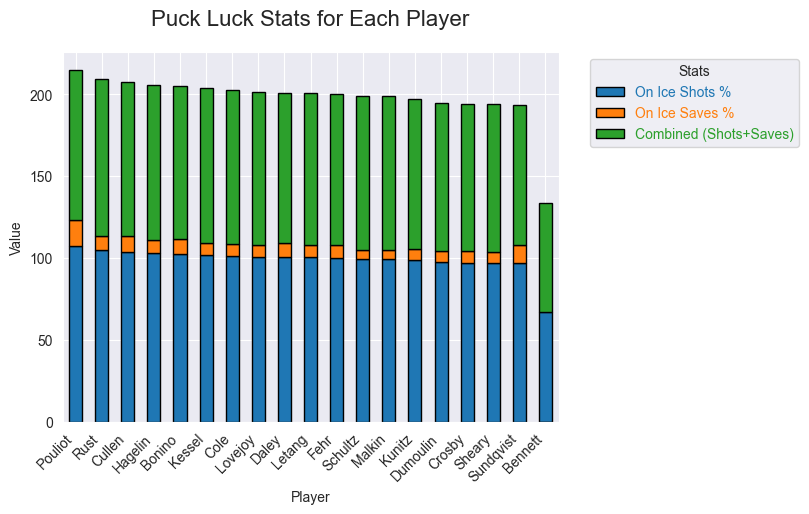

In [141]:
puck_luck_2016_melted = pd.melt(puck_luck_2016, id_vars='lastName')

# Pivot the DataFrame for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2016_melted.pivot(index='lastName', columns='variable', values='value')

# Sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)

# Use Seaborn stacked barplot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')

plt.title('Puck Luck Stats for Each Player', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

# Customize legend labels
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()

# Create a separate legend
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in puck_luck_2016_melted['variable'].unique()],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust legend color
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

# Rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

Our HBK line members ranked 3rd, 4th, and 5th for PDO in the 2016 Playoffs.

This graph makes it clear that the difference between players is, for the most part, very minor. A possible conclusion would be that due to hockey's interconnectedness as a sport, it is very difficult to untangle which player is responsible for an overall metric like PDO.

#### Just for fun, let's look at this same graph, but just for Forwards; players that are Right Wing, Center, or Left Wing

In [156]:
puck_luck_forwards_2016 = pens_player_stats_2016[['lastName','oiSH%', 'oiSV%','PDO', 'Pos']].sort_values(by='PDO', ascending=False)

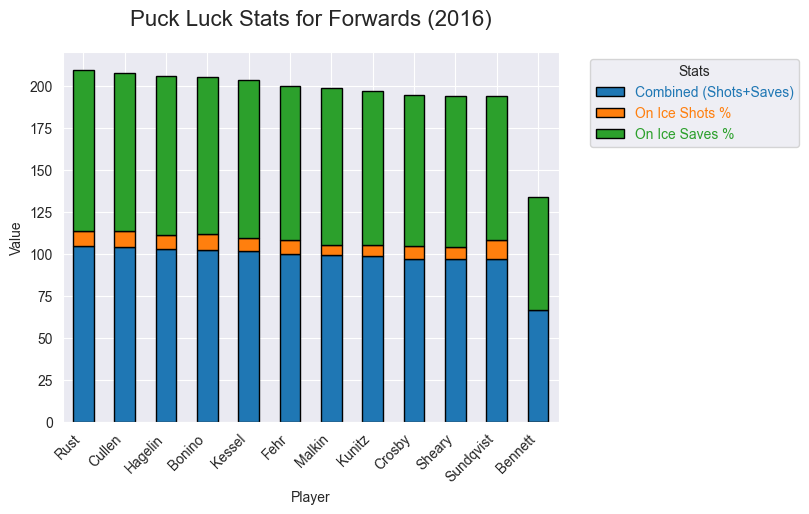

In [155]:
selected_positions = ['C', 'LW', 'RW']
puck_luck_2016_filtered = puck_luck_forwards_2016[puck_luck_forwards_2016['Pos'].isin(selected_positions)]
#melt the DataFrame
puck_luck_2016_melted = pd.melt(puck_luck_2016_filtered, id_vars='lastName', var_name='variable', value_name='value')
#create a pivot table for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2016_melted[puck_luck_2016_melted['variable'] != 'Pos'].pivot_table(
    index='lastName', columns='variable', values='value', aggfunc='sum')
#sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)
#plot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Puck Luck Stats for Forwards (2016)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels and create
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in df_puck_luck_pivoted.columns],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

Although the stats are still very close, it's easier to see players of interest here. 

One thing to consider: Althgouh Malkin, Kunitz, and Sheary ranked at the top for FF% and CF%, they are all ranked lower than our HBK line members with regards to PDO.

## Plus / Minus

PlusMinus, or +/- indicates the relationship between goals scored for the team, vs goals scored against the team. 

There is debate regarding the value, and yet this metric is commonly used in all of hockey analytics. 

The easiest way to consider player +/- is with visualizations:

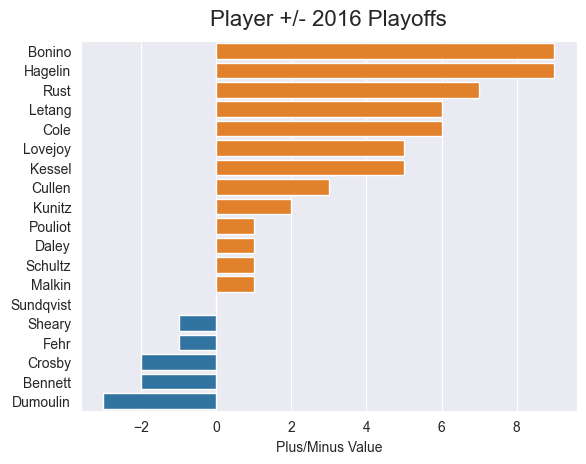

In [157]:
sns.barplot(x='plusMinus', y='lastName', data=pens_player_stats_2016, orient='h', hue=pens_player_stats_2016['plusMinus'] >= 0, order=pens_player_stats_2016.sort_values('plusMinus', ascending=False)['lastName'])
plt.xlabel('Plus/Minus Value')
plt.ylabel('')
plt.title('Player +/- 2016 Playoffs', fontsize=16, y=1.02)
plt.legend().set_visible(False)
#plt.savefig('PlayerPlusMinus2016.jpg')
plt.show()

For the 2016 Playoffs, all three members of the HBK line are ranked highly on the +/- scale.

However, it is surprsing that Bonino and Hagelin ranked so much higher than Kessel, given that Kessel was the highest scorer this year. If I had to guess, it may be connected with power plays/penalty kills. Perhaps Kessel played in more PKs, thus increasing his chances of getting scored on?

Either way, it's interesting to note that Crosby has a negative +/- this year, far below Kessel or any other top players.

## No way around it, goals are important

### Looking at goals for the entire 2016 playoffs vs. average icetime per player:

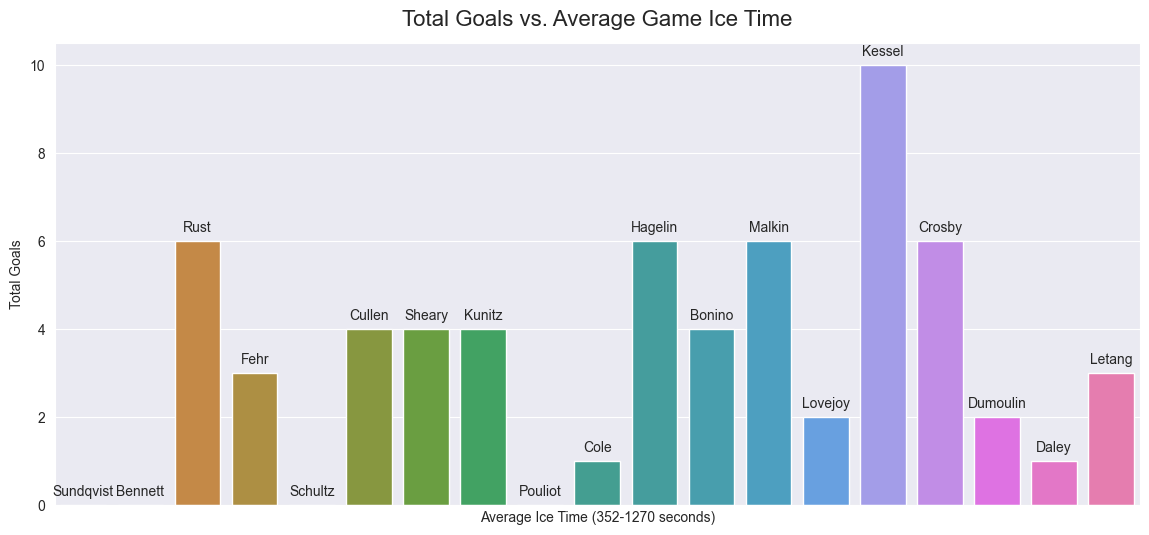

In [158]:
plt.figure(figsize=(14, 6))
# Create the bar plot
ax = sns.barplot(data=pens_player_stats_2016, x='timeOnIce', y='goals', hue='lastName', dodge=False)

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time', fontsize=16, y=1.02)
plt.xticks([])  # Remove x-axis labels
plt.legend().set_visible(False)  # Remove legend
plt.savefig('goalsVsIcetime2016.png')
plt.show()

As wel can see, for most players there is a correlation between ice time and goals. A notable exception would be Rust, who has very little average ice time, and significant goals. This is in line with what we saw earlier with Rust's shot success rate being exceptionally high.

Here I'm taking note that Crosby has more ice time and far fewer goals than Kessel, as well as Malkin having more ice time and equal goals as Hagelin.

It's a rough comparison, since Defense players spend much more time on the ice overall. Let's look at this graph with only Forwards: 



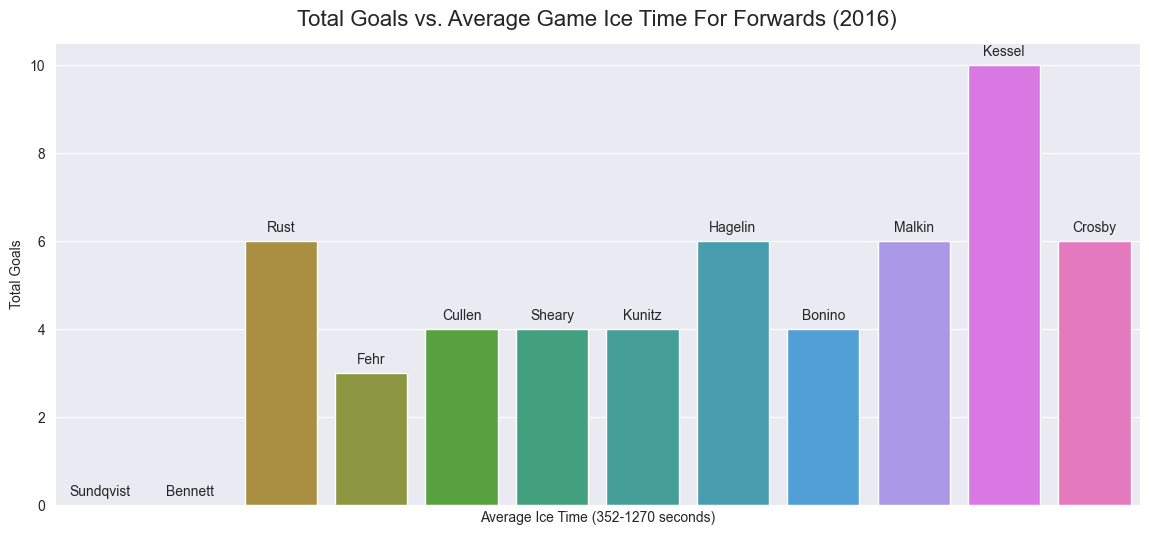

In [161]:
selected_positions = ['C', 'LW', 'RW']
filtered_data = pens_player_stats_2016[pens_player_stats_2016['Pos'].isin(selected_positions)]

plt.figure(figsize=(14, 6))
# Create the bar plot
ax = sns.barplot(data=filtered_data, x='timeOnIce', y='goals', hue='lastName', dodge=False, err_kws={'color': 'None'})

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time For Forwards (2016)', fontsize=16, y=1.02)
plt.xticks([])  # Remove x-axis labels
plt.legend().set_visible(False)  # Remove legend
plt.show()

Here, there is a more clear relationship between ice time and goals, indicating that Kessel is somewhat of an outlier. This could point to his notable acheivement this year.

### Visualizing player goals as a percent of the whole, with a focus on Hagelin, Bonino and Kessel:

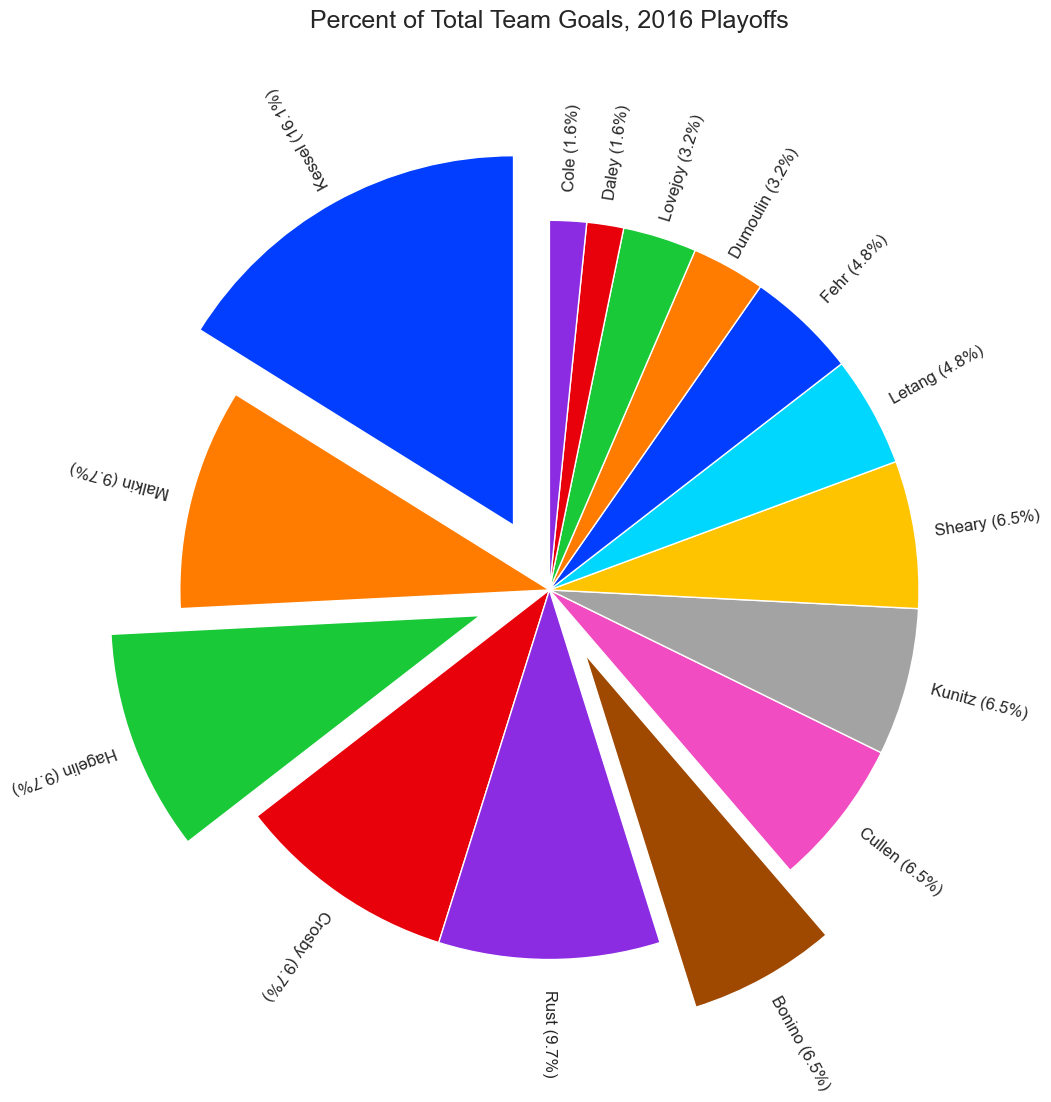

In [166]:
#filter players with non-zero goals
pens_player_stats_2016 = pens_player_stats_2016[pens_player_stats_2016['goals'] > 0]

labels = pens_player_stats_2016['lastName']
sizes = pens_player_stats_2016['goals']
colors = sns.color_palette("bright")
#sort by 'goals' in descending order
pens_player_stats_2016 = pens_player_stats_2016.sort_values(by='goals', ascending=False)
#define explode for specific slices
explode = [0.2 if label in ['Bonino', 'Hagelin', 'Kessel'] else 0 for label in labels]

plt.figure(figsize=(12, 12))
#draw pie chart without autopct labels
patches, _ = plt.pie(sizes, labels=None, startangle=90, colors=colors, explode=explode)

#calculate and display percentage labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (patches[i].theta1 + patches[i].theta2) / 2
    x = patches[i].center[0] + patches[i].r * 1.2 * np.cos(np.radians(angle))
    y = patches[i].center[1] + patches[i].r * 1.2 * np.sin(np.radians(angle))
    
    #calculate percentage
    percentage = (size / sizes.sum()) * 100
    
    plt.text(x, y, f'{label} ({percentage:.1f}%)', ha='center', va='center', rotation=angle, fontsize=12)

plt.title('Percent of Total Team Goals, 2016 Playoffs', fontsize=18, y=1.10)
plt.savefig('PercentTotalGoals2016.png')
plt.show()

#### As the pie chart shows, the HBK line accounted for nearly 1/3 of all goals for the 2016 playoffs (32.3%). 
This is impressive, since they are three people out of a team of 22 (14%). 

To compare:
- the first line (Crosby, Sheary, Hornqvist) accounted for 16.2% of the goals
- the second line (Malkin, Rust, Kunitz) accounted for 25.9% of the goals

**Using goals alone as a metric, it is clear that the HBK line had a heavy hand in the Penguins Stanley Cup win in 2016.**
